In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import math as m
import numpy as np  # 1.7 or higher
from ipywidgets import interactive
from IPython.display import display, Image
from IPython.display import YouTubeVideo


import PIL
from io import BytesIO


import cv2


import qgrid
import pandas as pd

import sympy as sym
sym.init_printing(order="none")
from sympy.vector import CoordSys3D
import sympy.vector as symvec


np.set_printoptions(suppress=True, 
                    formatter={'float_kind':'{:14.4f}'.format})  
%matplotlib inline


def display_img_array(ima):
    im = PIL.Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    display(Image(bio.getvalue(), format='png'))

def display_image(path):
    pil_im = PIL.Image.open(path)
    display(pil_im)



# embed python variables in latex
# then render with md
lx = lambda c: "$" + sym.latex(c) + "$"


In [15]:
posedf = pd.read_csv("Pose_est-2024-06-01T14:41:06.457116.csv")
posedf = posedf[248:285]
tim = posedf['time'].to_numpy()
tim = tim-tim[0]
posedf['time'] = tim
pose_widget = qgrid.show_grid(posedf, 
                            grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100},
                            show_toolbar=True)
display(pose_widget)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

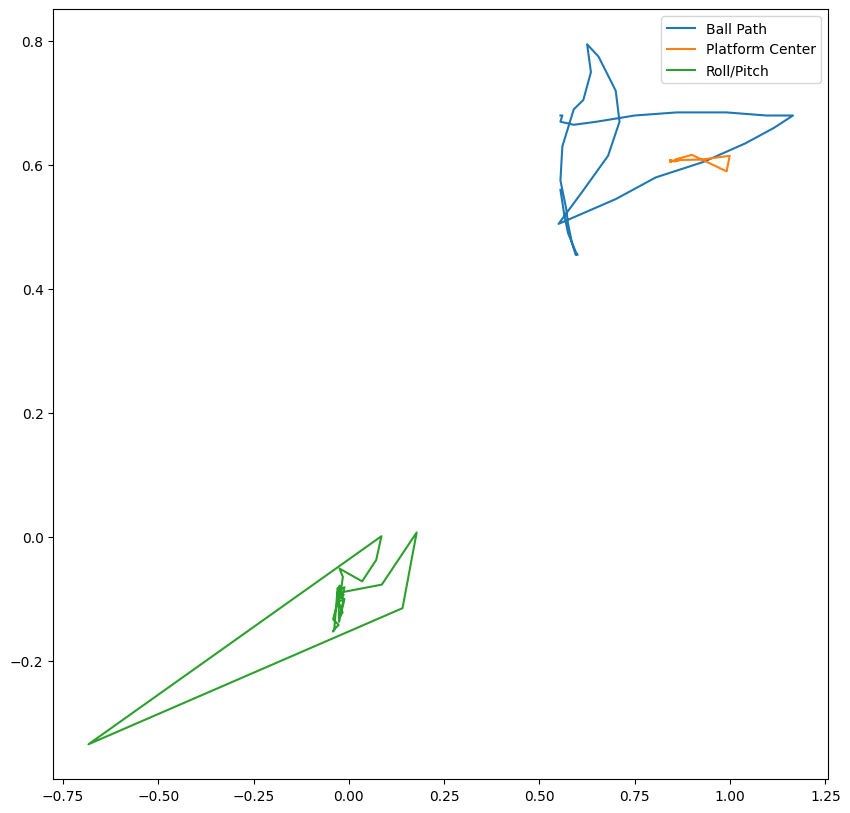

In [36]:
fig, axis = plt.subplots(figsize=(10, 10))
#ax.set_aspect('equal')

#tim = posedf['time'].to_numpy()
#tim = tim-tim[0]
#tim *= 1000

c1x = posedf['c3x'].to_numpy() / 400
c1y = posedf['c3y'].to_numpy() / 400

px = posedf['px'].to_numpy() / 400
py = posedf['py'].to_numpy() / 400

ds2x = posedf['ds2x'].to_numpy() / 100


v2x = posedf['v2x'].to_numpy() / 700
ax = posedf['ax'].to_numpy() / 3000

roll = posedf['roll'].to_numpy() / 36
pitch = posedf['pitch'].to_numpy() / 36

axis.plot(c1x, c1y, label="Ball Path")
axis.plot(px, py, label="Platform Center")
axis.plot(roll, pitch, label="Roll/Pitch")

#axis.set_title("Joystick characterization")
#axis.set_xlabel("Time(ms)")

axis.legend()

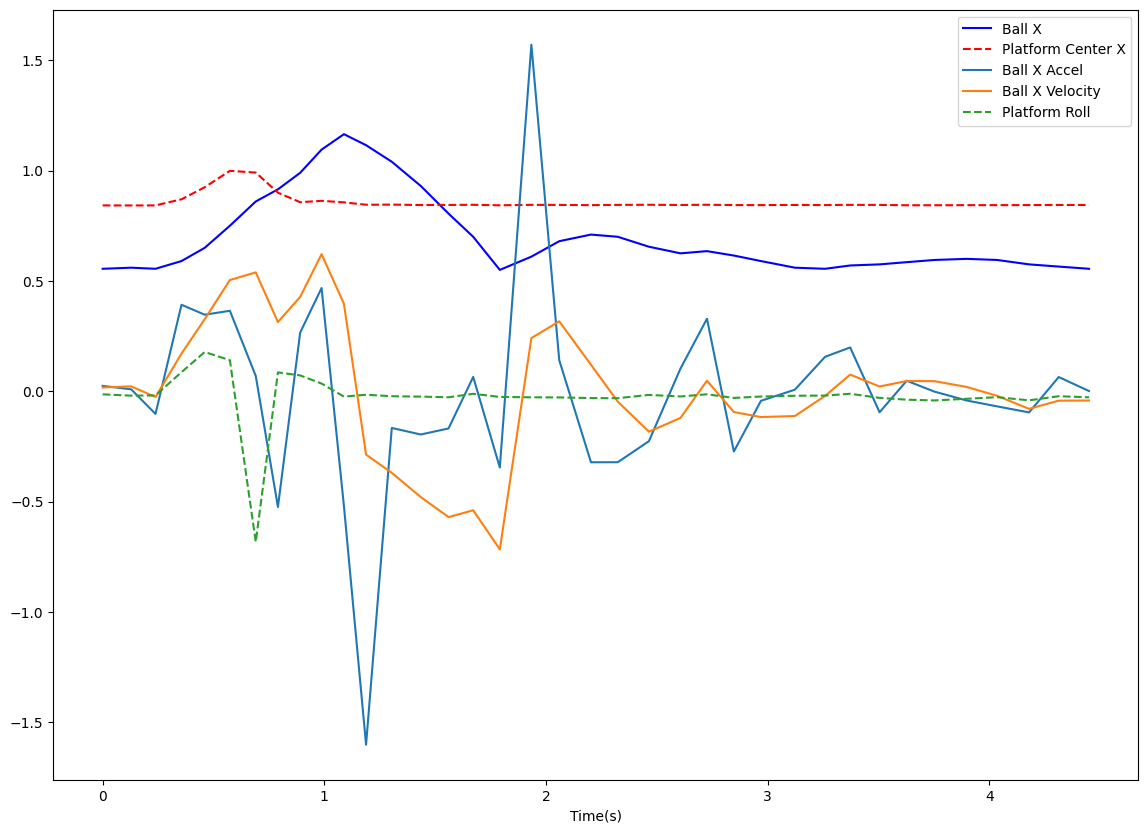

In [39]:
fig, axis = plt.subplots(figsize=(14, 10))

#axis.plot(tim, c1y, 'g-', label="Ball Y")
axis.plot(tim, c1x, 'b-', label="Ball X")
axis.plot(tim, px, 'r--', label="Platform Center X")
#axis.plot(tim, py, 'y--', label="Platform Center Y")
axis.plot(tim, ax, label = "Ball X Accel")
axis.plot(tim, v2x, label = "Ball X Velocity")
#axis.plot(tim, ds2x, label = "Ball X Distance")
axis.plot(tim, roll, '--', label = "Platform Roll")
#axis.plot(tim, pitch, '--', label = "Platform Pitch")



axis.set_xlabel("Time(s)")

axis.legend()

'Video of above test'

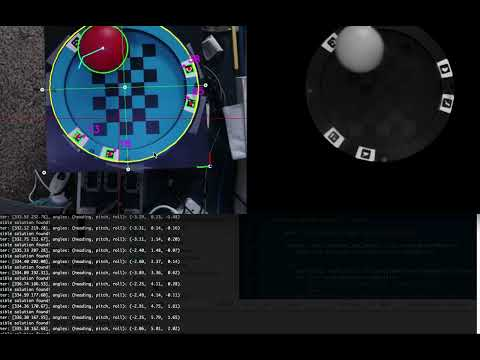

In [5]:
display("Video of above test")
display(YouTubeVideo('Uud9GGdhXBs'))